In [39]:
from scripts.data_genertion.consts import *
from scripts.features.feature_extraction import load_all_features

main_df = load_all_features()
main_df[SEQUENCE] = main_df[SEQUENCE].astype(str)

In [40]:
import numpy as np
main_df = main_df[main_df[CELL_LINE_ORGANISM] == 'human']
main_df

,index,ASO_volume(nM),Canonical Gene Name,Cell line organism,Cell_line,Chemical_Pattern,Density(cells_per_well),ISIS,Inhibition(%),Linkage,...,second_nucleotide,self_energy,sense_avg_accessibility,sense_length,sense_start,sense_start_from_end,sense_type,seq_length,stop_codon_count,true_length_of_seq
0,0,2000.0,KRAS,human,A431,CCCddddddddddCCC,5000.0,540733.0,33.0,phosphorothioate,...,C,-2393.391229,5.215761,16.0,41212.0,4472.0,intron,16.0,0.0625,16.0
1,1,2000.0,KRAS,human,A431,CCCddddddddddCCC,5000.0,540747.0,7.0,phosphorothioate,...,A,-690.438687,7.393584,16.0,23686.0,21998.0,intron,16.0,0.1250,16.0
2,2,2000.0,KRAS,human,A431,CCCddddddddddCCC,5000.0,540806.0,62.0,phosphorothioate,...,C,-4501.543687,6.227737,16.0,43363.0,2321.0,intron,16.0,0.0625,16.0
3,3,2000.0,KRAS,human,A431,CCCddddddddddCCC,5000.0,651479.0,28.0,phosphorothioate,...,G,-2163.971060,6.976352,16.0,23680.0,22004.0,intron,16.0,0.0625,16.0
4,4,2000.0,KRAS,human,A431,CCCddddddddddCCC,5000.0,651490.0,36.0,phosphorothioate,...,A,-4841.236060,8.586243,16.0,41168.0,4516.0,intron,16.0,0.0625,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34760,36885,40.0,APOL1,human,A431,CCCCdddddddddCCC,10000.0,905505.0,35.0,phosphorothioate,...,T,-1287.243687,3.543607,16.0,7827.0,6186.0,intron,16.0,0.0625,16.0
34761,36886,40.0,APOL1,human,A431,CCCCdddddddddCCC,10000.0,905634.0,18.0,phosphorothioate,...,T,-1722.368602,4.974214,16.0,8250.0,5763.0,intron,16.0,0.0625,16.0
34762,36887,40.0,APOL1,human,A431,CCCCdddddddddCCC,10000.0,905665.0,11.0,phosphorothioate,...,C,-1532.431145,3.712019,16.0,8335.0,5678.0,intron,16.0,0.0625,16.0
34763,36888,40.0,APOL1,human,A431,CCCddddCCCMddddd,10000.0,972163.0,36.0,phosphorothioate,...,G,-2896.418602,3.677199,16.0,13848.0,165.0,exon,16.0,0.0000,16.0


In [41]:
malat_asos = main_df[main_df[CANONICAL_GENE] == 'KRAS']
malat_asos[VOLUME].unique()

array([2000.,  556., 5000.,  185., 1667.,   37.,  125.])

In [44]:
log_correction = 2
main_df.loc[:, 'log_inhibition'] = -np.log(1 - main_df[INHIBITION] / 100 + log_correction / 100)
main_df.loc[:, 'log_inhibition']

0        0.371064
1        0.051293
2        0.916291
3        0.301105
4        0.415515
           ...   
34760    0.400478
34761    0.174353
34762    0.094311
34763    0.415515
34764    0.248461
Name: log_inhibition, Length: 29987, dtype: float64

In [76]:
main_df['corrected_volume'] = (main_df[VOLUME] * 0.0000601 + 0.537)

In [71]:
# mean_metric = INHIBITION
#
# keys = ['ISIS', VOLUME, TREATMENT_PERIOD, DENSITY_UPDATED, CHEMICAL_PATTERN]
#
# agg_spec = {mean_metric: 'mean'}
# agg_spec.update({c: 'first' for c in main_df.columns
#                  if c not in set(keys + [mean_metric])})
#
# main_df = main_df.groupby(keys, as_index=False).agg(agg_spec)

['HIF1A']
['IRF5']
Cell line: KARPAS-229 Gene: IRF5 samples: 916
Feature: corrected_volume                   , Pearson: 0.43 , p-value: 2.9e-42    Target: log_inhibition                     
Feature: corrected_volume                   , Spearman: 0.03 , p-value: 0.44       Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: 0.43 , p-value: 2.9e-42    Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Spearman: 0.03 , p-value: 0.44       Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: 0.31 , p-value: 7.3e-22    Target: Inhibition(%)                      
Feature: ASO_volume(nM)                     , Spearman: 0.02 , p-value: 0.47       Target: Inhibition(%)                      


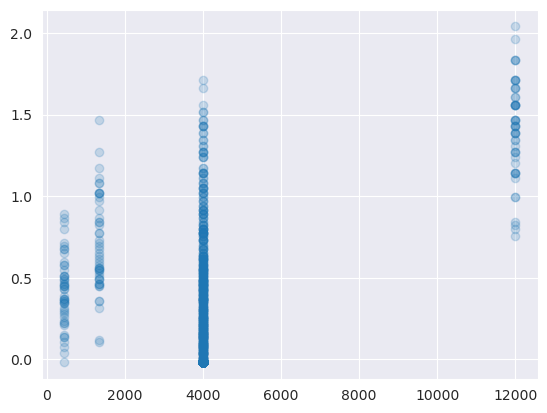

['SOD1' 'DGAT2']
Cell line: HepG2 Gene: SOD1 samples: 1501
Feature: corrected_volume                   , Pearson: 0.44 , p-value: 2.3e-70    Target: log_inhibition                     
Feature: corrected_volume                   , Spearman: 0.19 , p-value: 1.2e-13    Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: 0.44 , p-value: 2.3e-70    Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Spearman: 0.19 , p-value: 1.2e-13    Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: 0.33 , p-value: 3.7e-40    Target: Inhibition(%)                      
Feature: ASO_volume(nM)                     , Spearman: 0.19 , p-value: 3.8e-13    Target: Inhibition(%)                      


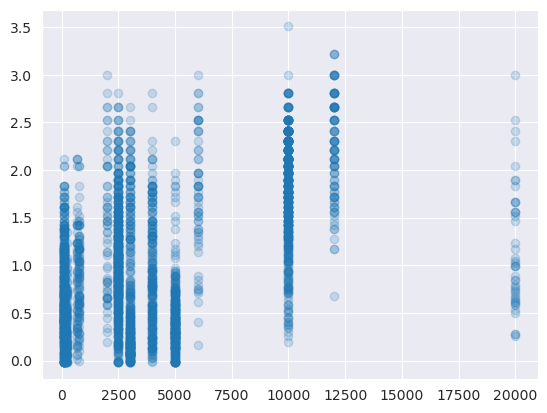

Cell line: HepG2 Gene: DGAT2 samples: 1829
Feature: corrected_volume                   , Pearson: 0.58 , p-value: 1.1e-163   Target: log_inhibition                     
Feature: corrected_volume                   , Spearman: 0.63 , p-value: 4.8e-204   Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: 0.58 , p-value: 1.1e-163   Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Spearman: 0.63 , p-value: 4.8e-204   Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: 0.54 , p-value: 1.2e-136   Target: Inhibition(%)                      
Feature: ASO_volume(nM)                     , Spearman: 0.64 , p-value: 1.1e-211   Target: Inhibition(%)                      


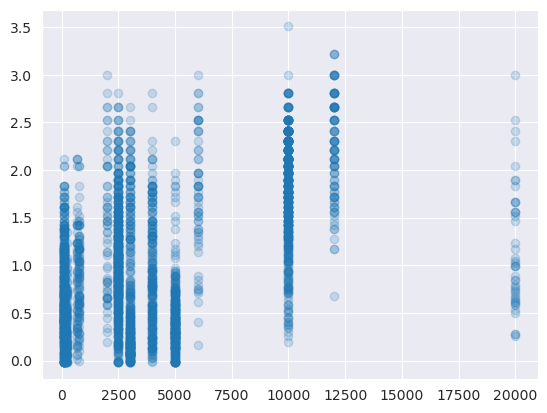

['SOD1' 'MALAT1' 'KRAS' 'APOL1']
Cell line: A431 Gene: SOD1 samples: 416
Feature: corrected_volume                   , Pearson: 0.42 , p-value: 2.9e-19    Target: log_inhibition                     
Feature: corrected_volume                   , Spearman: 0.47 , p-value: 1e-24      Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: 0.42 , p-value: 2.9e-19    Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Spearman: 0.47 , p-value: 1e-24      Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: 0.42 , p-value: 4.9e-19    Target: Inhibition(%)                      
Feature: ASO_volume(nM)                     , Spearman: 0.47 , p-value: 4.5e-24    Target: Inhibition(%)                      


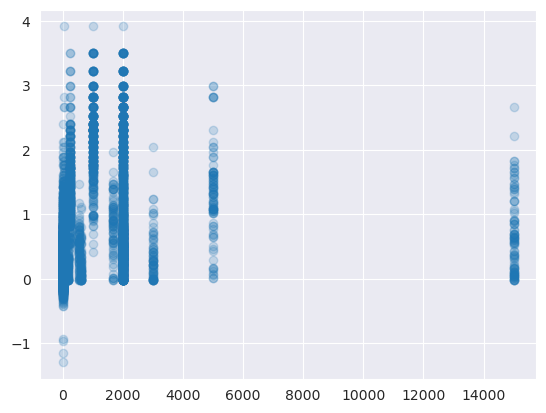

Cell line: A431 Gene: KRAS samples: 801
Feature: corrected_volume                   , Pearson: 0.44 , p-value: 7.2e-40    Target: log_inhibition                     
Feature: corrected_volume                   , Spearman: 0.13 , p-value: 0.0003     Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: 0.44 , p-value: 7.2e-40    Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Spearman: 0.13 , p-value: 0.0003     Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: 0.39 , p-value: 6.7e-30    Target: Inhibition(%)                      
Feature: ASO_volume(nM)                     , Spearman: 0.15 , p-value: 1.8e-05    Target: Inhibition(%)                      


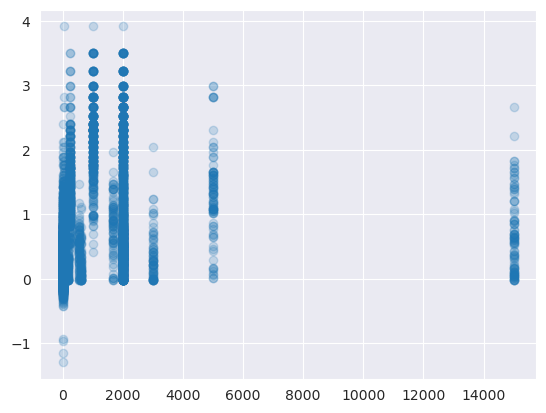

Cell line: A431 Gene: APOL1 samples: 1903
Feature: corrected_volume                   , Pearson: 0.37 , p-value: 9e-63      Target: log_inhibition                     
Feature: corrected_volume                   , Spearman: 0.47 , p-value: 7.3e-106   Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: 0.37 , p-value: 9e-63      Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Spearman: 0.47 , p-value: 7.3e-106   Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: 0.37 , p-value: 2.1e-62    Target: Inhibition(%)                      
Feature: ASO_volume(nM)                     , Spearman: 0.47 , p-value: 4.4e-105   Target: Inhibition(%)                      


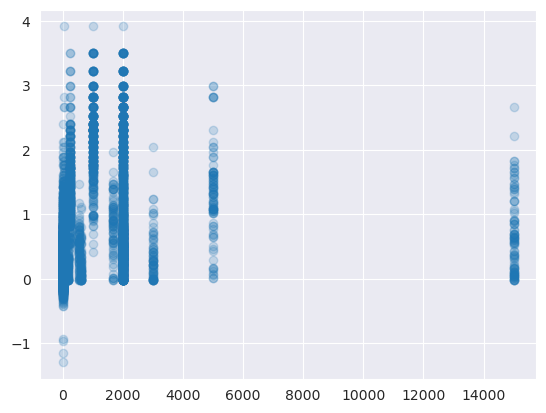

['KLKB1' 'HSD17B13']
Cell line: HepaRG Gene: HSD17B13 samples: 5362
Feature: corrected_volume                   , Pearson: 0.63 , p-value: 0.0        Target: log_inhibition                     
Feature: corrected_volume                   , Spearman: 0.57 , p-value: 0.0        Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: 0.63 , p-value: 0.0        Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Spearman: 0.57 , p-value: 0.0        Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: 0.52 , p-value: 0.0        Target: Inhibition(%)                      
Feature: ASO_volume(nM)                     , Spearman: 0.57 , p-value: 0.0        Target: Inhibition(%)                      


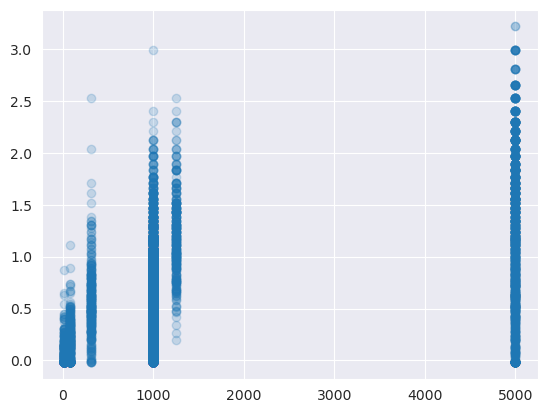

['IRF4']
Cell line: SK-MEL-28 Gene: IRF4 samples: 2671
Feature: corrected_volume                   , Pearson: 0.30 , p-value: 4.5e-57    Target: log_inhibition                     
Feature: corrected_volume                   , Spearman: 0.23 , p-value: 3.8e-32    Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: 0.30 , p-value: 4.5e-57    Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Spearman: 0.23 , p-value: 3.8e-32    Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: 0.23 , p-value: 2.7e-33    Target: Inhibition(%)                      
Feature: ASO_volume(nM)                     , Spearman: 0.24 , p-value: 3.2e-36    Target: Inhibition(%)                      


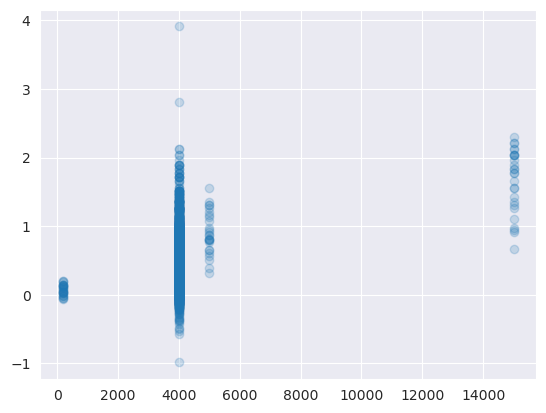

['IRF4']
Cell line: MM.1R Gene: IRF4 samples: 2735
Feature: corrected_volume                   , Pearson: 0.51 , p-value: 8e-180     Target: log_inhibition                     
Feature: corrected_volume                   , Spearman: 0.32 , p-value: 2.6e-64    Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: 0.51 , p-value: 8e-180     Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Spearman: 0.32 , p-value: 2.6e-64    Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: 0.38 , p-value: 2.8e-97    Target: Inhibition(%)                      
Feature: ASO_volume(nM)                     , Spearman: 0.31 , p-value: 7.3e-64    Target: Inhibition(%)                      


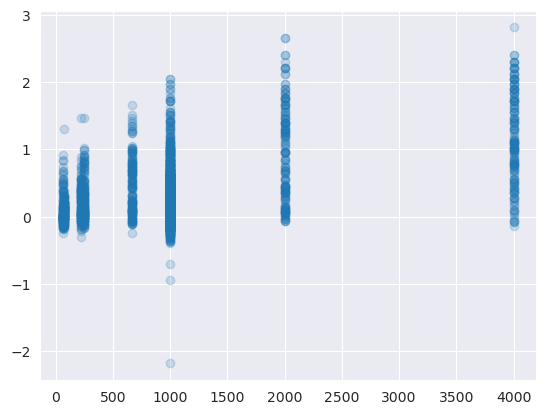

['IRF4']
Cell line: H929 Gene: IRF4 samples: 71
Feature: corrected_volume                   , Pearson: -0.09, p-value: 0.46       Target: log_inhibition                     
Feature: corrected_volume                   , Spearman: -0.03, p-value: 0.83       Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: -0.09, p-value: 0.46       Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Spearman: -0.03, p-value: 0.83       Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: -0.05, p-value: 0.68       Target: Inhibition(%)                      
Feature: ASO_volume(nM)                     , Spearman: -0.02, p-value: 0.85       Target: Inhibition(%)                      


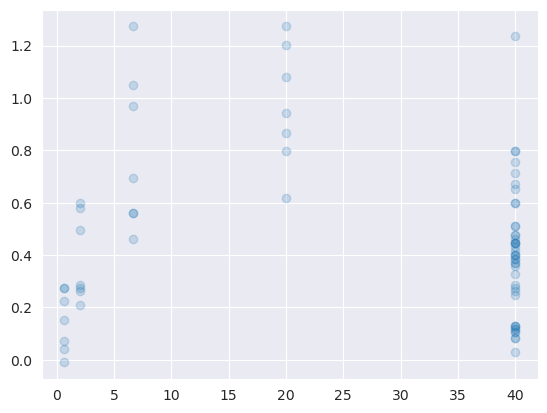

['IRF4']
['KRAS']
['SOD1' 'SNCA']
Cell line: SH-SY5Y Gene: SOD1 samples: 126
Feature: corrected_volume                   , Pearson: 0.79 , p-value: 2.2e-28    Target: log_inhibition                     
Feature: corrected_volume                   , Spearman: 0.87 , p-value: 5.2e-40    Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: 0.79 , p-value: 2.2e-28    Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Spearman: 0.87 , p-value: 5.2e-40    Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: 0.74 , p-value: 3.3e-23    Target: Inhibition(%)                      
Feature: ASO_volume(nM)                     , Spearman: 0.87 , p-value: 5.2e-40    Target: Inhibition(%)                      


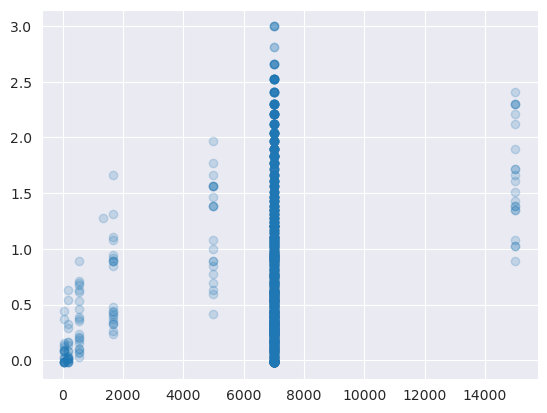

Cell line: SH-SY5Y Gene: SNCA samples: 1542
Feature: corrected_volume                   , Pearson: -0.02, p-value: 0.52       Target: log_inhibition                     
Feature: corrected_volume                   , Spearman: -0.02, p-value: 0.37       Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: -0.02, p-value: 0.52       Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Spearman: -0.02, p-value: 0.37       Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: -0.02, p-value: 0.36       Target: Inhibition(%)                      
Feature: ASO_volume(nM)                     , Spearman: -0.02, p-value: 0.34       Target: Inhibition(%)                      


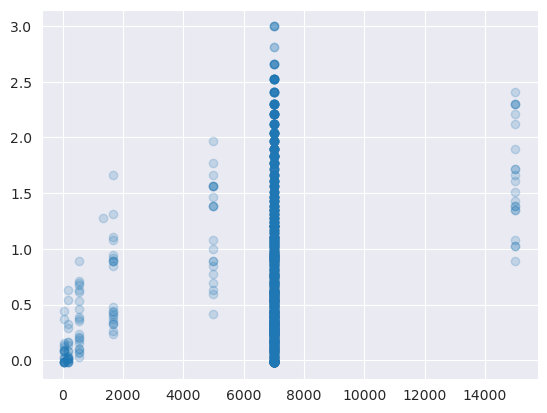

['SNCA']
['YAP1']
['IRF5']
Cell line: A-431 Gene: IRF5 samples: 120
Feature: corrected_volume                   , Pearson: 0.67 , p-value: 8.4e-17    Target: log_inhibition                     
Feature: corrected_volume                   , Spearman: 0.83 , p-value: 4.2e-31    Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: 0.67 , p-value: 8.4e-17    Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Spearman: 0.83 , p-value: 4.2e-31    Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: 0.64 , p-value: 3.9e-15    Target: Inhibition(%)                      
Feature: ASO_volume(nM)                     , Spearman: 0.83 , p-value: 3.7e-31    Target: Inhibition(%)                      


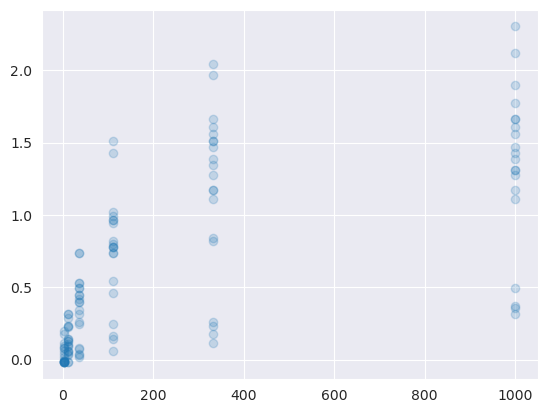

['SNHG14']
Cell line: Human Neuronal Cell Gene: SNHG14 samples: 1762
Feature: corrected_volume                   , Pearson: 0.32 , p-value: 3.7e-43    Target: log_inhibition                     
Feature: corrected_volume                   , Spearman: 0.36 , p-value: 1.4e-55    Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: 0.32 , p-value: 3.7e-43    Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Spearman: 0.36 , p-value: 1.4e-55    Target: log_inhibition                     
Feature: ASO_volume(nM)                     , Pearson: 0.31 , p-value: 8.8e-41    Target: Inhibition(%)                      
Feature: ASO_volume(nM)                     , Spearman: 0.36 , p-value: 1.4e-55    Target: Inhibition(%)                      


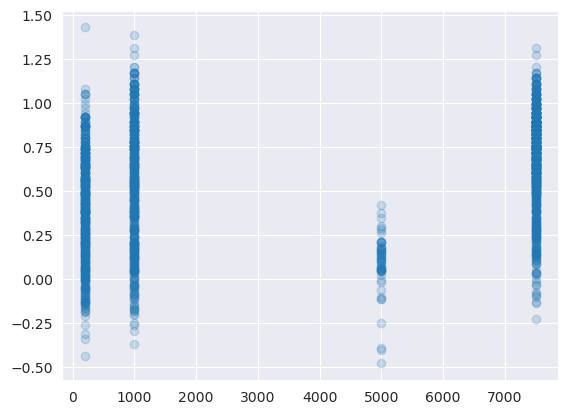

['HTRA1']
['MYH7']


In [77]:
from scripts.util.print import print_correlations
import matplotlib.pyplot as plt

cell_lines = main_df[CELL_LINE].unique()

volume_metric = 'corrected_volume'
for cell_line in cell_lines:
    cell_line_df = main_df[main_df[CELL_LINE] == cell_line]
    genes = cell_line_df[CANONICAL_GENE].unique()
    print(genes)
    for gene in genes:
        gene_df = cell_line_df[cell_line_df[CANONICAL_GENE] == gene]
        if len(gene_df[volume_metric].unique()) <= 1:
            continue
        print(f"Cell line: {cell_line} Gene: {gene} samples: {len(gene_df)}")
        print_correlations(gene_df, volume_metric, 'log_inhibition')
        print_correlations(gene_df, VOLUME, 'log_inhibition')
        print_correlations(gene_df, VOLUME, INHIBITION)
        plt.scatter(cell_line_df[VOLUME], cell_line_df['log_inhibition'], alpha=0.2)
        plt.show()

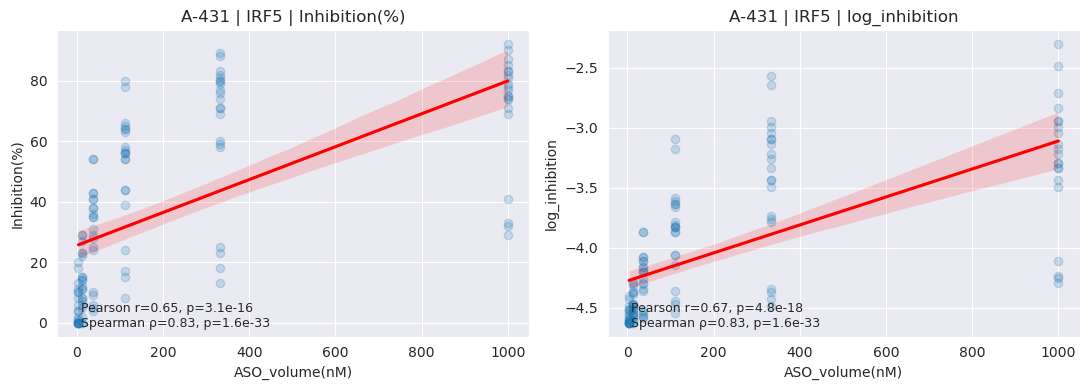

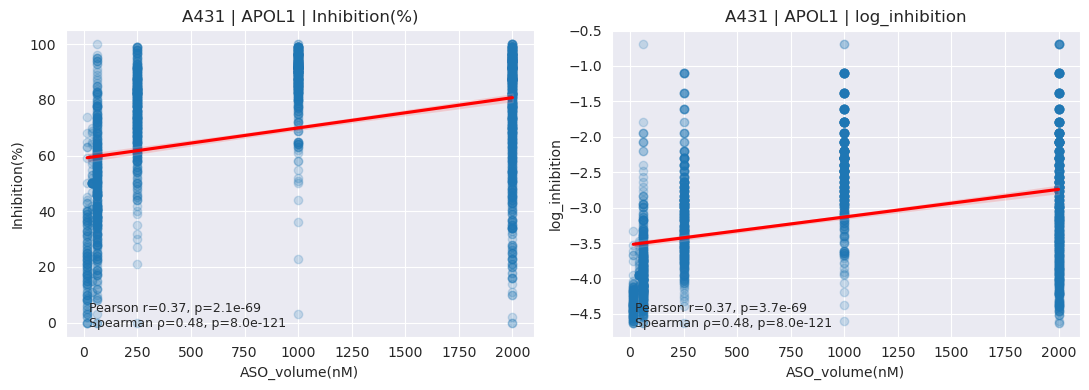

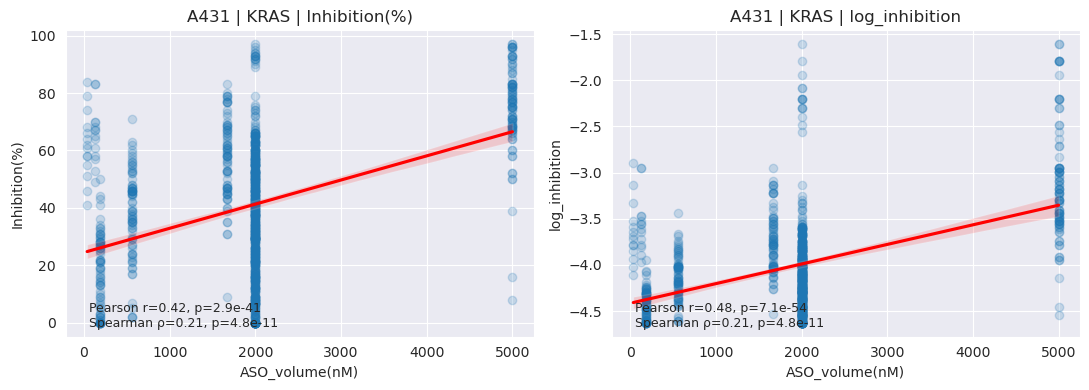

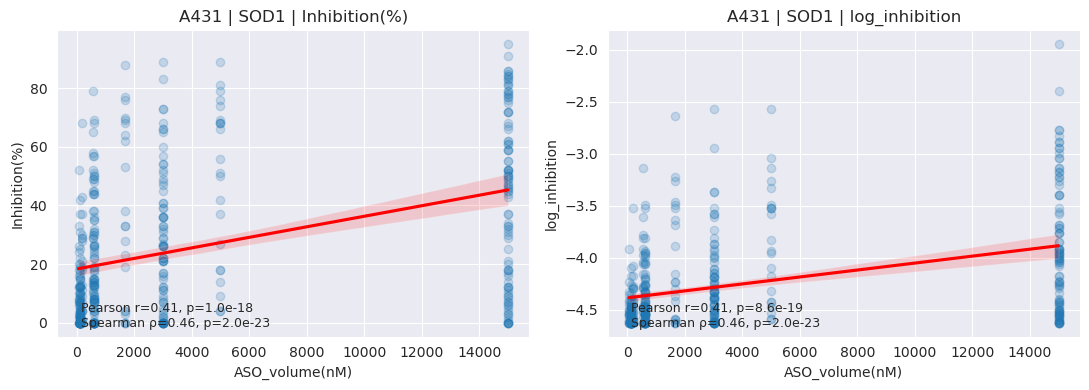

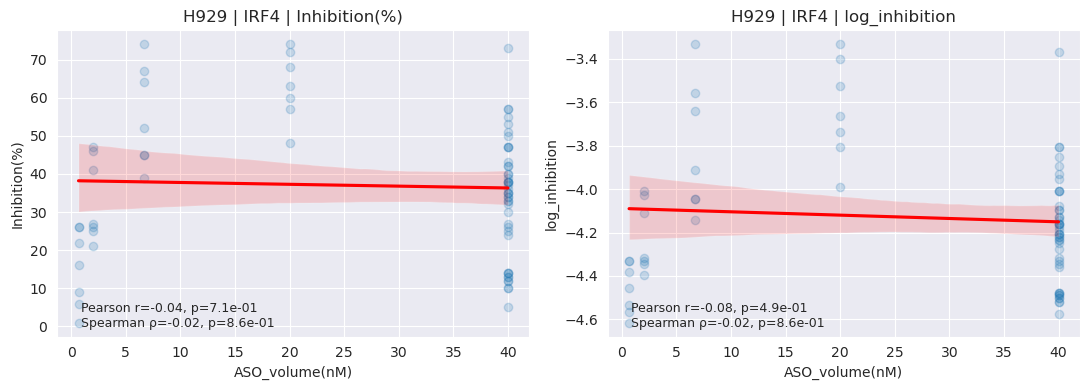

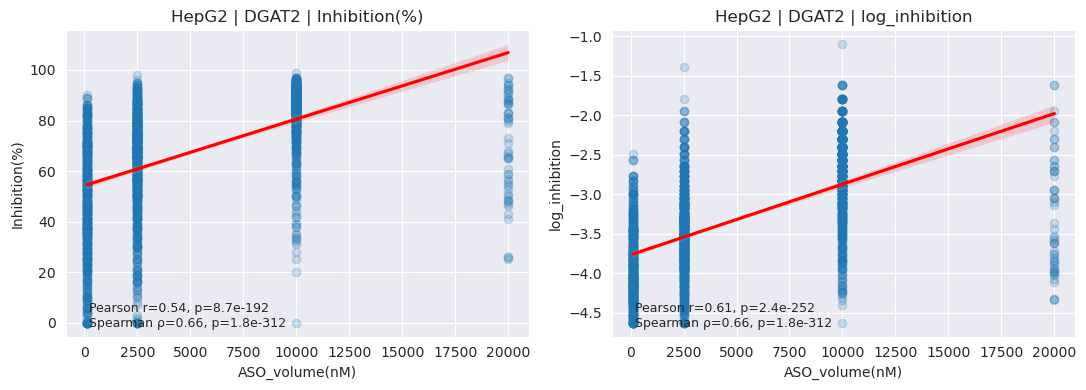

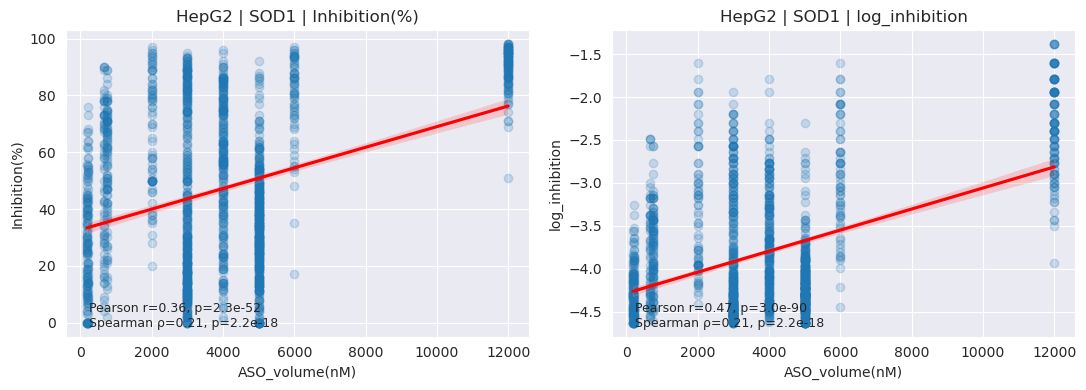

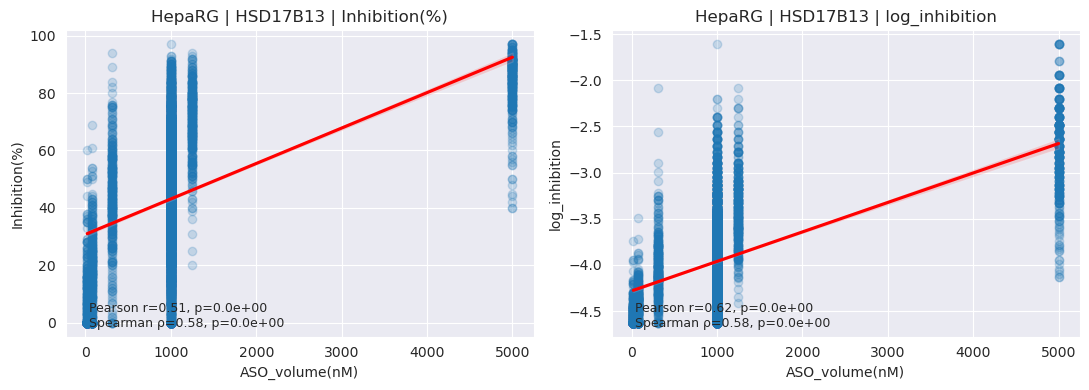

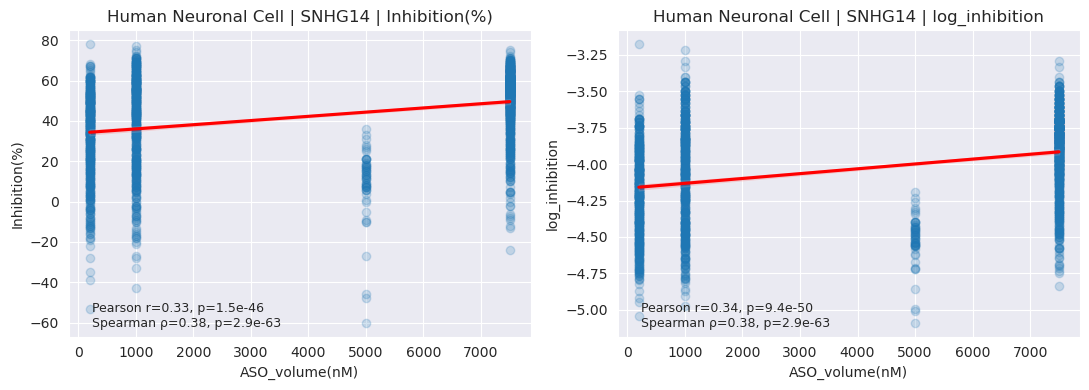

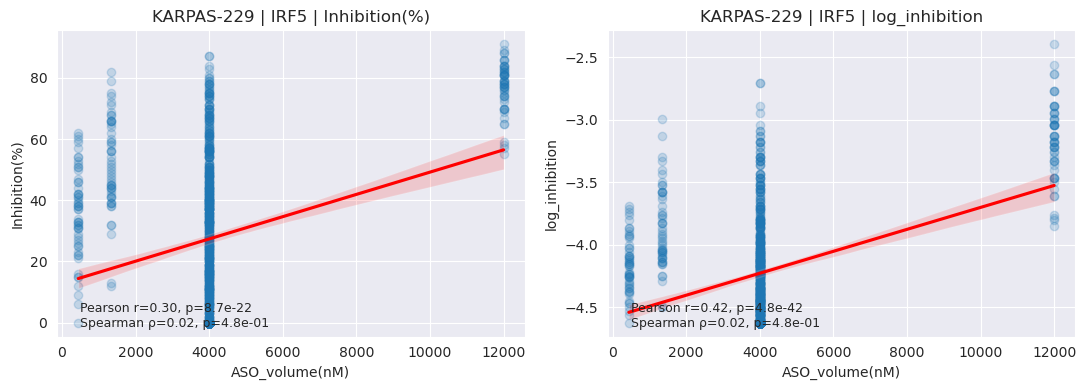

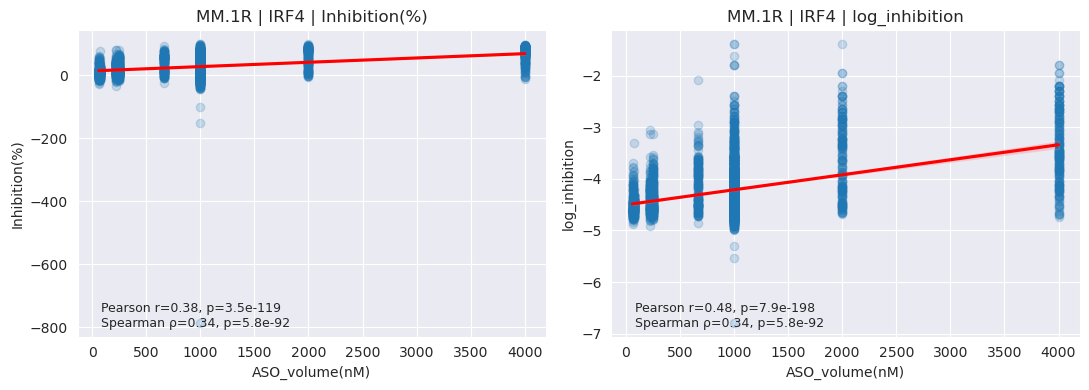

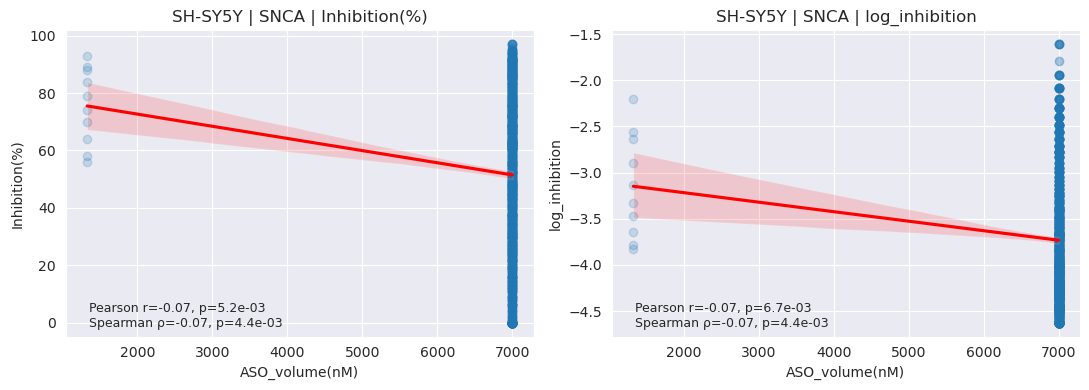

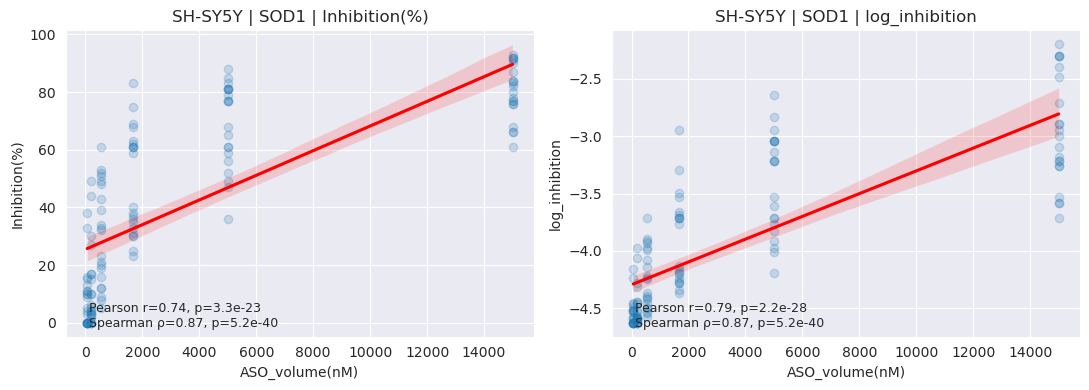

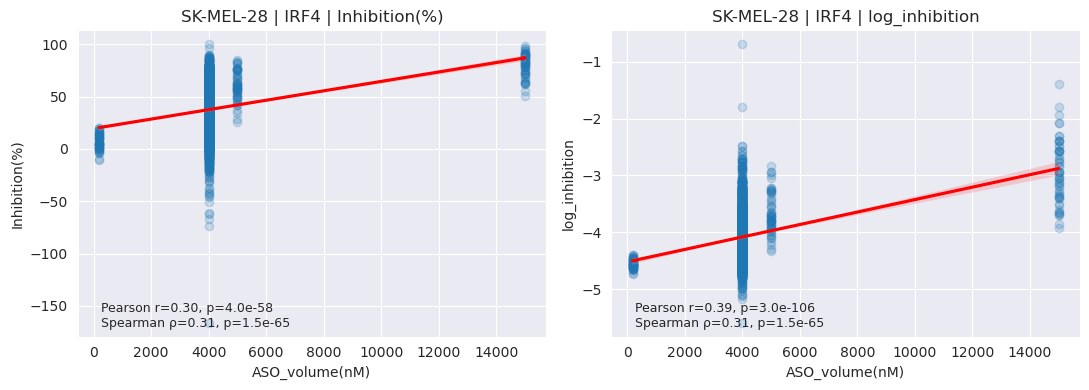

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

for (cell_line, gene), gdf in main_df.groupby([CELL_LINE, CANONICAL_GENE]):
    if len(gdf) < 20:
        continue
    if len(gdf[VOLUME].unique()) <= 1:
        continue

    fig, axes = plt.subplots(1, 2, figsize=(11,4), sharex=True)

    for ax, target in zip(axes, ["Inhibition(%)", "log_inhibition"]):
        sns.regplot(x=VOLUME, y=target, data=gdf,
                    scatter_kws={"alpha":0.2}, line_kws={"color":"red"}, ax=ax)
        p, pp = pearsonr(gdf[VOLUME], gdf[target])
        s, sp = spearmanr(gdf[VOLUME], gdf[target])

        ax.set_title(f"{cell_line} | {gene} | {target}")
        ax.text(0.05, 0.02,
                f"Pearson r={p:.2f}, p={pp:.1e}\nSpearman ρ={s:.2f}, p={sp:.1e}",
                transform=ax.transAxes, ha="left", va="bottom", fontsize=9)

    plt.tight_layout()
    plt.show()



In [58]:
from scipy.stats import pearsonr, linregress
import pandas as pd
import numpy as np

cols = [VOLUME, "Inhibition(%)", "log_inhibition"]

# Prep & keep only valid groups (>=20 rows and >1 unique volume)
tmp = main_df[[CELL_LINE, CANONICAL_GENE] + cols].dropna().copy()
gb = tmp.groupby([CELL_LINE, CANONICAL_GENE])
tmp["_n"] = gb[VOLUME].transform("size")
tmp["_nunq"] = gb[VOLUME].transform("nunique")
df_all = tmp[(tmp["_n"] >= 20) & (tmp["_nunq"] > 1)].copy()

# Global pooled slope/intercept for log_inhibition (and inhibition for completeness)
if len(df_all):
    lr_inh_all = linregress(df_all[VOLUME], df_all["Inhibition(%)"])
    lr_log_all = linregress(df_all[VOLUME], df_all["log_inhibition"])
    a_inh, b_inh = lr_inh_all.slope, lr_inh_all.intercept
    a_log, b_log = lr_log_all.slope, lr_log_all.intercept

    x_all = df_all[VOLUME].to_numpy()
    y_inh_all = df_all["Inhibition(%)"].to_numpy()
    y_log_all = df_all["log_inhibition"].to_numpy()

    # Raw pooled Pearson
    p_inh_all, _ = pearsonr(x_all, y_inh_all)
    p_log_all, _ = pearsonr(x_all, y_log_all)

    # After GLOBAL correction (residuals)
    y_inh_corr_all = y_inh_all - (a_inh * x_all + b_inh)
    y_log_corr_all = y_log_all - (a_log * x_all + b_log)
    p_inh_corr_all, p_inh_corr_p = pearsonr(x_all, y_inh_corr_all)
    p_log_corr_all, p_log_corr_p = pearsonr(x_all, y_log_corr_all)
else:
    a_inh = b_inh = a_log = b_log = np.nan
    p_inh_all = p_log_all = p_inh_corr_all = p_log_corr_all = np.nan
    p_inh_corr_p = p_log_corr_p = np.nan

# Per-group table with an extra column: Pearson(x, log_inhibition - (a_log*x + b_log)) using GLOBAL a_log,b_log
print("Cell line\tGene\tSamples\tPearson(Inhibition)\tPearson(log_inhibition)\t"
      "Slope(Inhibition)\tIntercept(Inhibition)\tSlope(log_inhibition)\tIntercept(log_inhibition)\t"
      "Pearson_log_after_GLOBAL_correction")

for (cell_line, gene), gdf in df_all.groupby([CELL_LINE, CANONICAL_GENE]):
    df = gdf[cols]
    x = df[VOLUME].to_numpy()
    y_inh = df["Inhibition(%)"].to_numpy()
    y_log = df["log_inhibition"].to_numpy()

    p_inh, _ = pearsonr(x, y_inh)
    p_log, _ = pearsonr(x, y_log)

    lr_inh = linregress(x, y_inh)
    lr_log = linregress(x, y_log)

    # Pearson within this group after applying GLOBAL log correction
    if np.isfinite(a_log):
        y_log_corr = y_log - (a_log * x + b_log)
        p_log_corr_g, _ = pearsonr(x, y_log_corr) if (x.std()>0 and y_log_corr.std()>0) else (np.nan, np.nan)
    else:
        p_log_corr_g = np.nan

    print(f"{cell_line}\t{gene}\t{len(df)}\t{p_inh:.3f}\t{p_log:.3f}\t"
          f"{lr_inh.slope:.6g}\t{lr_inh.intercept:.6g}\t{lr_log.slope:.6g}\t{lr_log.intercept:.6g}\t"
          f"{p_log_corr_g:.6g}")

# Print GLOBAL summary once (tab-friendly)
print("\nGLOBAL\tALL\t{N}\tPearson_raw_Inh\tPearson_raw_Log\tSlope_Inh\tIntercept_Inh\tSlope_Log\tIntercept_Log\tPearson_after_corr_Inh\tpval\tPearson_after_corr_Log\tpval".format(N=len(df_all)))
print("GLOBAL\tALL\t{N}\t{pr_inh:.6g}\t{pr_log:.6g}\t{a_inh:.6g}\t{b_inh:.6g}\t{a_log:.6g}\t{b_log:.6g}\t{pc_inh:.6g}\t{pcp_inh:.1e}\t{pc_log:.6g}\t{pcp_log:.1e}"
      .format(N=len(df_all),
              pr_inh=p_inh_all, pr_log=p_log_all,
              a_inh=a_inh, b_inh=b_inh, a_log=a_log, b_log=b_log,
              pc_inh=p_inh_corr_all, pcp_inh=p_inh_corr_p,
              pc_log=p_log_corr_all, pcp_log=p_log_corr_p))


Cell line	Gene	Samples	Pearson(Inhibition)	Pearson(log_inhibition)	Slope(Inhibition)	Intercept(Inhibition)	Slope(log_inhibition)	Intercept(log_inhibition)	Pearson_log_after_GLOBAL_correction
A-431	IRF5	120	0.639	0.667	0.0540009	25.8691	0.0011671	0.334201	0.64775
A431	APOL1	1903	0.369	0.370	0.0106103	58.3981	0.000375093	1.0508	0.317088
A431	KRAS	801	0.386	0.443	0.00789233	23.4889	0.000196404	0.187467	0.32453
A431	SOD1	416	0.418	0.421	0.00184276	18.7097	3.45451e-05	0.224532	-0.324503
H929	IRF4	71	-0.050	-0.089	-0.0545541	38.2728	-0.00168254	0.517116	-0.0921589
HepG2	DGAT2	1829	0.536	0.578	0.00262782	51.4713	8.28413e-05	0.789383	0.190894
HepG2	SOD1	1501	0.333	0.435	0.00340486	34.1331	0.000115305	0.36548	0.225365
HepaRG	HSD17B13	5362	0.517	0.626	0.0124321	30.1386	0.000322123	0.306427	0.546829
Human Neuronal Cell	SNHG14	1762	0.311	0.320	0.00197887	34.0196	3.13164e-05	0.441284	-0.296303
KARPAS-229	IRF5	916	0.310	0.429	0.00370767	11.7085	8.81457e-05	0.00725334	0.149279
MM.1R	IRF4	2735	0.385	0